# SVM

Основная идея SVM состоит в том, чтобы провести разделительную линию так, чтобы границы решения были как можно шире, а сама линия находилась максимально далеко от двух ближайших образцов классов.

## Классификация с широким (жестким) зазором

Если SVM пытается построить наиболее возможную широкую полосу границ решения, то такая классификация с SVM называется **классификацией с широким (жестким) зазором**. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris['data'][:, (0, 1)]
y = iris['target']

После загрузки датасета выберем первые два класса из 3-х, чтобы показывать примеры на бинарной классификации. Конечно же, на мультиклассовой классификации всё то же самое, просто обучается SVM по стратегии OvO.

In [3]:
X = X[(iris['target'] == 0) | (iris['target'] == 1)]
y = y[(iris['target'] == 0) | (iris['target'] == 1)]

Создадим SVM классификатор, при этом укажем `C` (параметр регуляризации) максимально возможным. Тем самым мы добьемся классификации с широким зазором.

In [4]:
svm = SVC(kernel='linear', C=float(np.inf))
svm.fit(X, y)

SVC(C=inf, kernel='linear')

In [5]:
def plot_svm(svm, X, y, xmin, xmax, ymin, ymax, save=None):
    # Рисуем точки
    plt.figure(figsize=(15, 10))
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=300, facecolors='yellow')
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=50, c='blue', marker='s')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s=50, c='red', marker='^')

    # Рисуем границу решений и две линии зазора
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    w = svm.coef_[0]
    b = svm.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    boundary = -w[0]/w[1] * x0 - b/w[1]

    plt.plot(x0, boundary, 'k-', linewidth=2)
    plt.plot(x0, boundary + 1/w[1], 'g--', linewidth=1)
    plt.plot(x0, boundary - 1/w[1], 'g--', linewidth=1)

    # Настройки графика
    plt.xlabel('Длина чашечки', fontsize=24, labelpad=30)
    plt.ylabel('Ширина чашечки', fontsize=24, labelpad=30)
    ax = plt.gca()
    ax.tick_params(labelsize=22)
    plt.axis([xmin, xmax, ymin, ymax])
    if save:
        plt.savefig(save, dpi=200)
    plt.show()

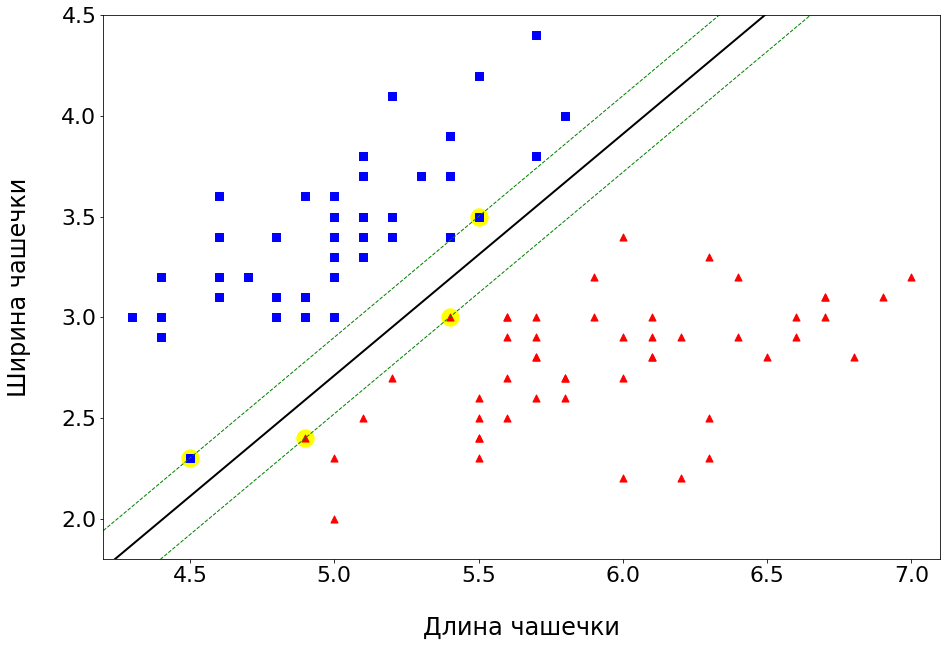

In [6]:
plot_svm(svm, X, y, *[4.2, 7.1, 1.8, 4.5], save='hard_margin.png')

На графике желтым отмечены **опорные вектора**. Полоса решений SVM полностью определяются крайними образцами, лежащими на её границах. Такие образцы как раз и называются опорными векторами. Добавление новых образцов за этой полосой никак не повлияет на неё саму. Однако добавление новых образцов внутрь полосы изменит её, т.к. новые образцы станут новыми опорными векторами. 

## Чувствительность к масштабу

Важно отметить, что SVM **чувствительны** к масштабу признаков!

In [25]:
X = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
y = np.array([0, 0, 1, 1])

In [26]:
svm = SVC(kernel='linear', C=np.inf)
svm.fit(X, y)

SVC(C=inf, kernel='linear')

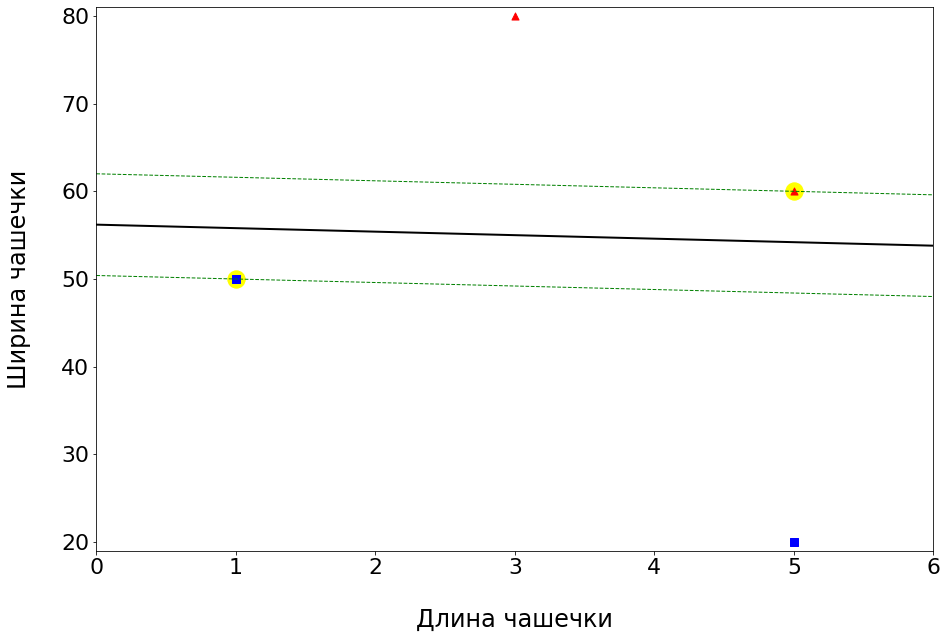

In [27]:
plot_svm(svm, X, y, 
         X[:, 0].min()-1, X[:, 0].max()+1, 
         X[:, 1].min()-1, X[:, 1].max()+1)

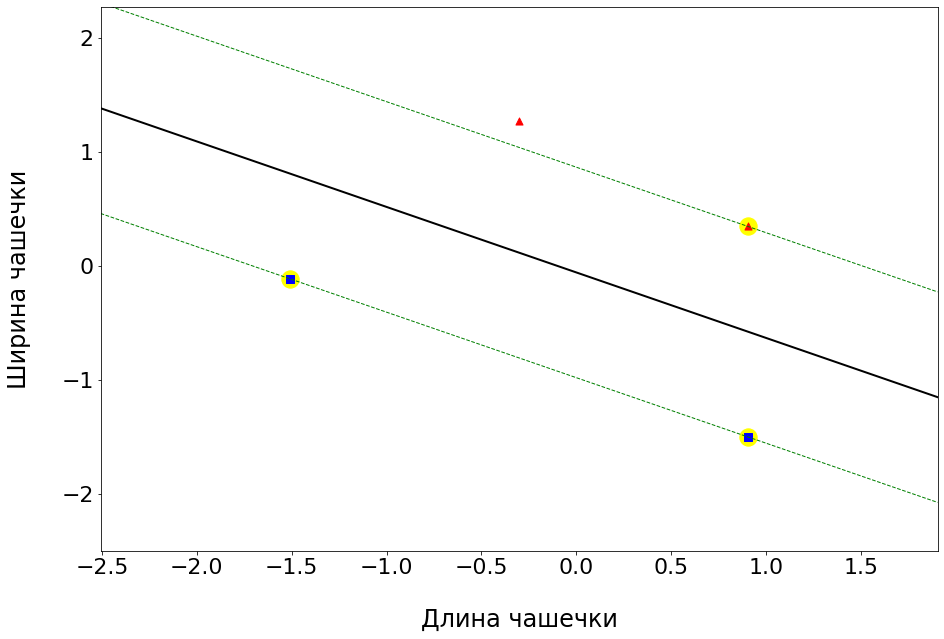

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm.fit(X_scaled, y)

plot_svm(svm, X_scaled, y, 
         X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 
         X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1)

На двух картинках мы можем увидеть значительную разницу в масштабах и то, как SVM под эти масштабы подстраивается. Вполне логично, что во втором случае граница выглядит куда разумнее, чем в первом.